### Parameters:
System:
* **abilities**:
    * **cha**
    * **con**
    * **dex**
    * **int**
    * **str**
    * **wis**
* **attributes**
    * **hp**
    * **ac**
    * **perception**
    * **speed** (*land speed*)
        * **other speeds**: fly, climb, swim
    * **num immunities**
    * **resistances**: fire, cold, electricity, acid, piercing, slashing, physical, bludgeoning, mental, poison, all-damage
    * **weaknesses**: cold-iron, good, fire, cold, area-damage, splash-damage, evil, slashing
* **saves**
    * **fortitude**
    * **reflex**
    * **will**
* **resources**
    * **focus**

Items
* **items**
    * **melee**
    * **ranged**
    * **spells nr**

### Prediction: *level*

## Loading data

In [1]:
import numpy as np
import pandas as pd
import sys

import os
import pathlib

from training.creating_dataset import load_and_preprocess_data

sys.path.append("../../..")

current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path).parent.parent.parent / "pathfinder_2e_data"
DATASET_FILES = [
    "pathfinder-bestiary.db",
    "pathfinder-bestiary-2.db",
    "pathfinder-bestiary-3.db",
]
DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
characteristics = [
    "cha",
    "con",
    "dex",
    "int",
    "str",
    "wis",
    "ac",
    "hp",
    "perception",
    "fortitude",
    "reflex",
    "will",
    "focus",
    "land_speed",
    "num_immunities",
    "fly",
    "swim",
    "climb",
    "fire_resistance",
    "cold_resistance",
    "electricity_resistance",
    "acid_resistance",
    "piercing_resistance",
    "slashing_resistance",
    "physical_resistance",
    "bludgeoning_resistance",
    "mental_resistance",
    "poison_resistance",
    "all-damage_resistance",
    "cold-iron_weakness",
    "good_weakness",
    "fire_weakness",
    "cold_weakness",
    "area-damage_weakness",
    "splash-damage_weakness",
    "evil_weakness",
    "slashing_weakness",
    "melee",
    "ranged",
    "spells",
]

df = load_and_preprocess_data(
    DATASET_PATHS,
    characteristics=characteristics,
)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 1205
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   str                     1206 non-null   int64  
 1   perception              1206 non-null   int64  
 2   book                    1206 non-null   object 
 3   con                     1206 non-null   int64  
 4   cha                     1206 non-null   int64  
 5   land_speed              1206 non-null   float64
 6   num_immunities          1206 non-null   int64  
 7   hp                      1206 non-null   int64  
 8   focus                   1206 non-null   int32  
 9   int                     1206 non-null   int64  
 10  ac                      1206 non-null   int64  
 11  dex                     1206 non-null   int64  
 12  fortitude               1206 non-null   int64  
 13  will                    1206 non-null   int64  
 14  reflex                  1206 non-null   

In [3]:
df.head()

,str,perception,book,con,cha,land_speed,num_immunities,hp,focus,int,...,spells_nr_lvl_4,spells_nr_lvl_5,spells_nr_lvl_6,spells_nr_lvl_7,spells_nr_lvl_8,spells_nr_lvl_9,melee_max_bonus,avg_melee_dmg,ranged_max_bonus,avg_ranged_dmg
0,7,20,Pathfinder Bestiary,5,1,30.0,3,215,1,1,...,0,0,0,0,0,0,23,22.0,0,0.0
1,9,16,Pathfinder Bestiary,5,1,35.0,0,220,0,-4,...,0,0,0,0,0,0,23,22.0,0,0.0
2,7,17,Pathfinder Bestiary,6,-2,30.0,0,175,0,-4,...,0,0,0,0,0,0,21,16.0,0,0.0
3,7,30,Pathfinder Bestiary,5,6,50.0,3,315,1,6,...,1,0,1,0,0,0,33,31.5,0,0.0
4,-5,6,Pathfinder Bestiary,1,1,0.0,0,20,1,-1,...,1,0,0,0,0,0,0,0.0,8,5.0


## Train test split

### Chronological split

In [4]:
from training.splitting_dataset import split_dataframe


os.chdir("../../../training")
X_train, X_test, y_train, y_test = split_dataframe(df, test_size=0.31)
os.chdir("../notebooks/models/random_forest")

In [5]:
X_train = X_train.drop(columns=["book"])
X_test = X_test.drop(columns=["book"])

In [6]:
X_train = X_train.astype("int64")
y_train = y_train.astype("int64")

### Random split

In [7]:
(
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
) = split_dataframe(df, chronological_split=False)

In [8]:
X_train_random_split = X_train_random_split.drop(columns=["book"])
X_test_random_split = X_test_random_split.drop(columns=["book"])

## Random Forest

### With chronological split

In [9]:
from sklearn.ensemble import RandomForestRegressor


rf_reg = RandomForestRegressor(n_estimators=500, max_depth=2, random_state=0, n_jobs=-1)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, n_estimators=500, n_jobs=-1, random_state=0)

In [10]:
y_pred_train = rf_reg.predict(X_train)
y_pred_test = rf_reg.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 5.05
RMSE: 2.25


In [12]:
results = pd.DataFrame(
    data={
        "Split type": [],
        "Tuning type": [],
        "Number of characteristics": [],
        "MSE": [],
        "RMSE": [],
    }
)

results.loc[0] = ["chronological", "normal", len(X_test.columns), mse, rmse]

In [13]:
from training.results import check_round_predictions, plot_confusion_matrix


check_round_predictions(["round", 0.33, 0.45], y_test, y_pred_test)

Normal:
MSE: 5.05
RMSE: 2.25

Round type: round
MSE: 5.32
RMSE: 2.31

Round type: 0.33
MSE: 5.03
RMSE: 2.24

Round type: 0.45
MSE: 5.31
RMSE: 2.30



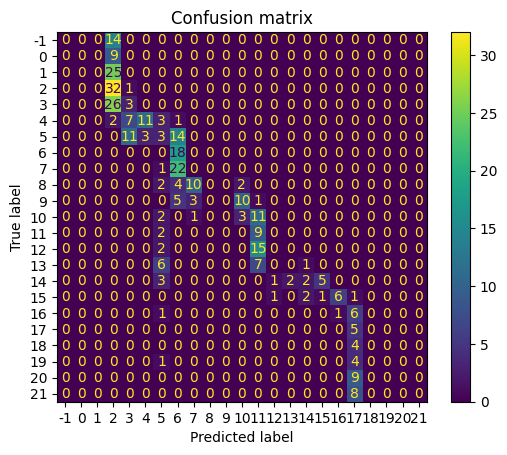

In [14]:
plot_confusion_matrix("round", y_pred_test, y_test)

#### Tuning

In [15]:
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start=100, stop=800, num=8)]
max_features = [0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_depth = list(range(10, 111, 10)) + [None]

hyper_params = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
}

hyper_params

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
 'max_features': [0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}

In [16]:
rf = RandomForestRegressor(random_state=0, n_jobs=-1)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=hyper_params,
    n_iter=100,
    scoring="neg_mean_absolute_error",
    cv=3,
    verbose=2,
    random_state=42,
    return_train_score=True,
)

rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ...max_depth=70, max_features=0.2, n_estimators=200; total time=   4.1s
[CV] END ...max_depth=70, max_features=0.2, n_estimators=200; total time=   0.3s
[CV] END ...max_depth=70, max_features=0.2, n_estimators=200; total time=   0.3s
[CV] END ...max_depth=30, max_features=0.4, n_estimators=700; total time=   1.9s
[CV] END ...max_depth=30, max_features=0.4, n_estimators=700; total time=   1.4s
[CV] END ...max_depth=30, max_features=0.4, n_estimators=700; total time=   1.4s
[CV] END ...max_depth=90, max_features=0.3, n_estimators=200; total time=   0.3s
[CV] END ...max_depth=90, max_features=0.3, n_estimators=200; total time=   0.7s
[CV] END ...max_depth=90, max_features=0.3, n_estimators=200; total time=   0.3s
[CV] END .max_depth=None, max_features=0.1, n_estimators=800; total time=   1.8s
[CV] END .max_depth=None, max_features=0.1, n_estimators=800; total time=   1.1s
[CV] END .max_depth=None, max_features=0.1, n_

{'n_estimators': 500, 'max_features': 0.3, 'max_depth': None}

In [17]:
from training.results import assess_regression_model


rmse, mse = assess_regression_model(rf_random, X_train, X_test, y_train, y_test)

RMSE train: 0.13
RMSE test: 0.84
MSE test: 0.70



In [18]:
results.loc[1] = ["chronological", "RandomizedSearchCV", len(X_test.columns), mse, rmse]

In [19]:
predict = rf_random.predict(X_test)
check_round_predictions(["round", 0.33, 0.45], y_test, predict)

Normal:
MSE: 0.70
RMSE: 0.84

Round type: round
MSE: 0.82
RMSE: 0.91

Round type: 0.33
MSE: 0.69
RMSE: 0.83

Round type: 0.45
MSE: 0.75
RMSE: 0.86



### Attempt to decrease overfitting
Change max_depth to 9 and n_estimators to 500

In [20]:
rf = RandomForestRegressor(
    random_state=0, n_jobs=-1, n_estimators=500, max_features=0.3, max_depth=9
)
rf.fit(X_train, y_train)
rmse, mse = assess_regression_model(rf, X_train, X_test, y_train, y_test)

RMSE train: 0.15
RMSE test: 0.83
MSE test: 0.69



In [21]:
results.loc[2] = [
    "chronological",
    "minimalise_overfitting",
    len(X_test.columns),
    mse,
    rmse,
]

In [22]:
predict = rf.predict(X_test)
check_round_predictions(["round", 0.33, 0.45], y_test, predict)

Normal:
MSE: 0.69
RMSE: 0.83

Round type: round
MSE: 0.81
RMSE: 0.90

Round type: 0.33
MSE: 0.65
RMSE: 0.80

Round type: 0.45
MSE: 0.76
RMSE: 0.87



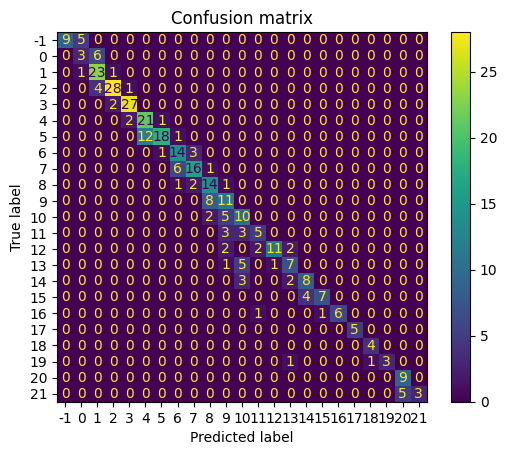

In [23]:
plot_confusion_matrix("round", predict, y_test)

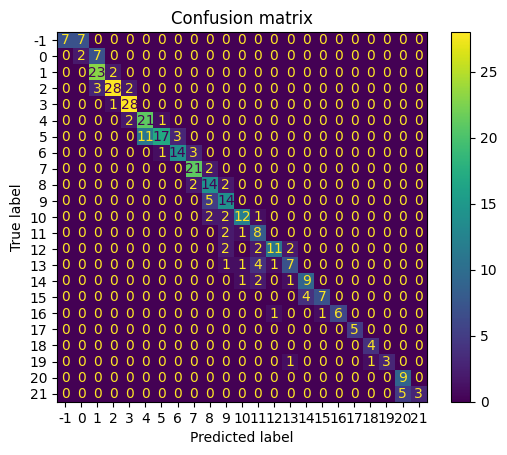

In [24]:
plot_confusion_matrix(0.33, predict, y_test)

## Random split

In [25]:
rf_reg = RandomForestRegressor(n_estimators=500, max_depth=2, random_state=0, n_jobs=-1)
rf_reg.fit(X_train_random_split, y_train_random_split)

RandomForestRegressor(max_depth=2, n_estimators=500, n_jobs=-1, random_state=0)

In [26]:
y_pred_train = rf_reg.predict(X_train_random_split)
y_pred_test = rf_reg.predict(X_test_random_split)

In [27]:
mse = mean_squared_error(y_test_random_split, y_pred_test)
rmse = mean_squared_error(y_test_random_split, y_pred_test, squared=False)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 1.51
RMSE: 1.23


In [28]:
results.loc[3] = ["random", "normal", len(X_test.columns), mse, rmse]

In [29]:
check_round_predictions(["round", 0.33, 0.45], y_test_random_split, y_pred_test)

Normal:
MSE: 1.51
RMSE: 1.23

Round type: round
MSE: 1.63
RMSE: 1.28

Round type: 0.33
MSE: 1.63
RMSE: 1.28

Round type: 0.45
MSE: 1.65
RMSE: 1.29



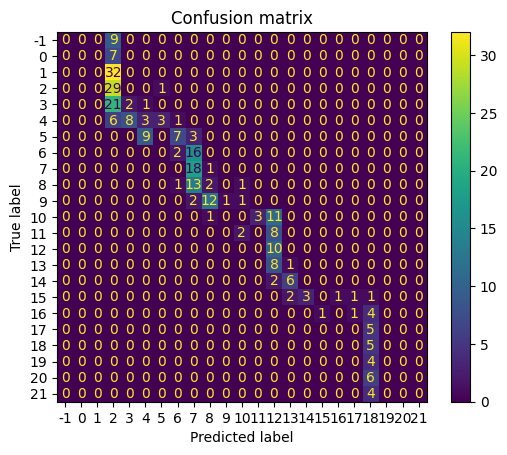

In [30]:
plot_confusion_matrix("round", y_pred_test, y_test_random_split)

### Tuning

In [31]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=800, num=8)]
max_features = [0.1, 0.2, 0.3, 0.4, 0.5]
max_depth = list(range(10, 111, 10)) + [None]

hyper_params = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
}

hyper_params

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}

In [32]:
rf = RandomForestRegressor(random_state=0, n_jobs=-1)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=hyper_params,
    n_iter=100,
    scoring="neg_mean_absolute_error",
    cv=3,
    verbose=2,
    random_state=42,
    return_train_score=True,
)

rf_random.fit(X_train_random_split, y_train_random_split)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ...max_depth=20, max_features=0.5, n_estimators=200; total time=   1.0s
[CV] END ...max_depth=20, max_features=0.5, n_estimators=200; total time=   0.5s
[CV] END ...max_depth=20, max_features=0.5, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=110, max_features=0.2, n_estimators=700; total time=   1.7s
[CV] END ..max_depth=110, max_features=0.2, n_estimators=700; total time=   1.7s
[CV] END ..max_depth=110, max_features=0.2, n_estimators=700; total time=   1.5s
[CV] END ..max_depth=100, max_features=0.5, n_estimators=300; total time=   1.2s
[CV] END ..max_depth=100, max_features=0.5, n_estimators=300; total time=   0.9s
[CV] END ..max_depth=100, max_features=0.5, n_estimators=300; total time=   1.0s
[CV] END ...max_depth=70, max_features=0.5, n_estimators=600; total time=   1.5s
[CV] END ...max_depth=70, max_features=0.5, n_estimators=600; total time=   1.3s
[CV] END ...max_depth=70, max_features=0.5, n_

{'n_estimators': 400, 'max_features': 0.3, 'max_depth': None}

In [33]:
rmse, mse = assess_regression_model(
    rf_random,
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
)

RMSE train: 0.14
RMSE test: 0.34
MSE test: 0.11



In [34]:
results.loc[4] = ["random", "RandomizedSearchCV", len(X_test.columns), mse, rmse]

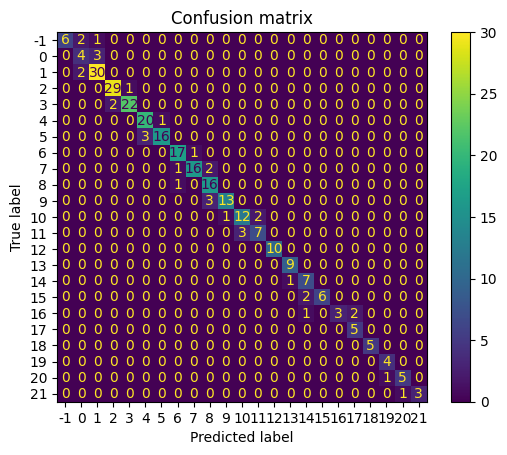

In [35]:
predict_random_split = rf_random.predict(X_test_random_split)
plot_confusion_matrix("round", predict_random_split, y_test_random_split)

### Attempt to decrease overfitting
Change max_depth to 10

In [36]:
rf_random.best_params_

{'n_estimators': 400, 'max_features': 0.3, 'max_depth': None}

In [37]:
rf = RandomForestRegressor(
    random_state=0, n_jobs=-1, n_estimators=500, max_features=0.3, max_depth=11
)
rf.fit(X_train_random_split, y_train_random_split)
rmse, mse = assess_regression_model(
    rf,
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
)

RMSE train: 0.15
RMSE test: 0.34
MSE test: 0.11



In [38]:
results.loc[5] = ["random", "minimalise_overfitting", len(X_test.columns), mse, rmse]

Check rounded predictions

In [39]:
predict_random_split = rf.predict(X_test_random_split)

check_round_predictions(
    ["round", 0.33, 0.45], y_test_random_split, predict_random_split
)

Normal:
MSE: 0.11
RMSE: 0.34

Round type: round
MSE: 0.15
RMSE: 0.39

Round type: 0.33
MSE: 0.16
RMSE: 0.39

Round type: 0.45
MSE: 0.14
RMSE: 0.37



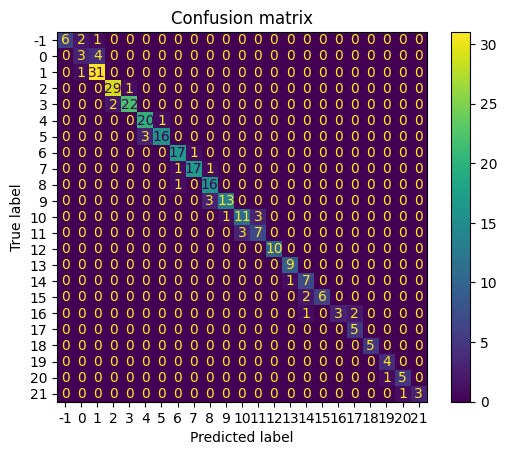

In [40]:
plot_confusion_matrix("round", predict_random_split, y_test_random_split)

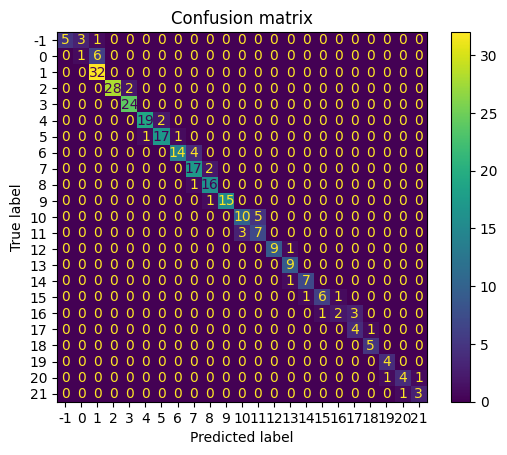

In [41]:
plot_confusion_matrix(0.33, predict_random_split, y_test_random_split)

## Summary

In [42]:
results

,Split type,Tuning type,Number of characteristics,MSE,RMSE
0,chronological,normal,50,5.052730,2.247828
1,chronological,RandomizedSearchCV,50,0.704853,0.839555
2,chronological,minimalise_overfitting,50,0.687472,0.829139
3,random,normal,50,1.511850,1.229573
4,random,RandomizedSearchCV,50,0.114700,0.338673
5,random,minimalise_overfitting,50,0.112652,0.335637


In [43]:
from training.results import plot_summary

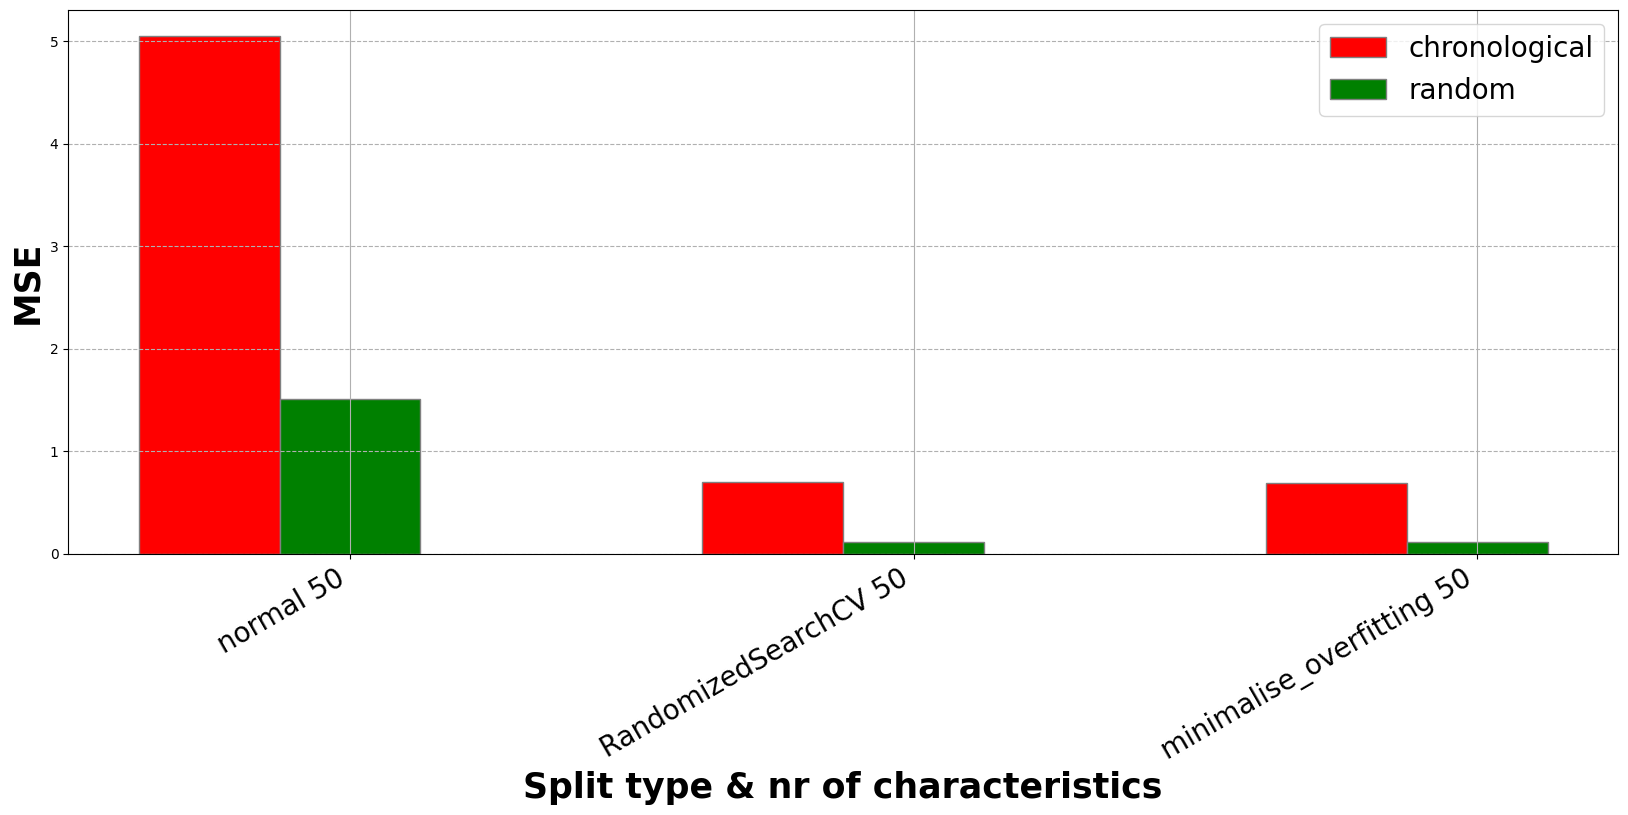

In [44]:
plot_summary(results, "MSE")

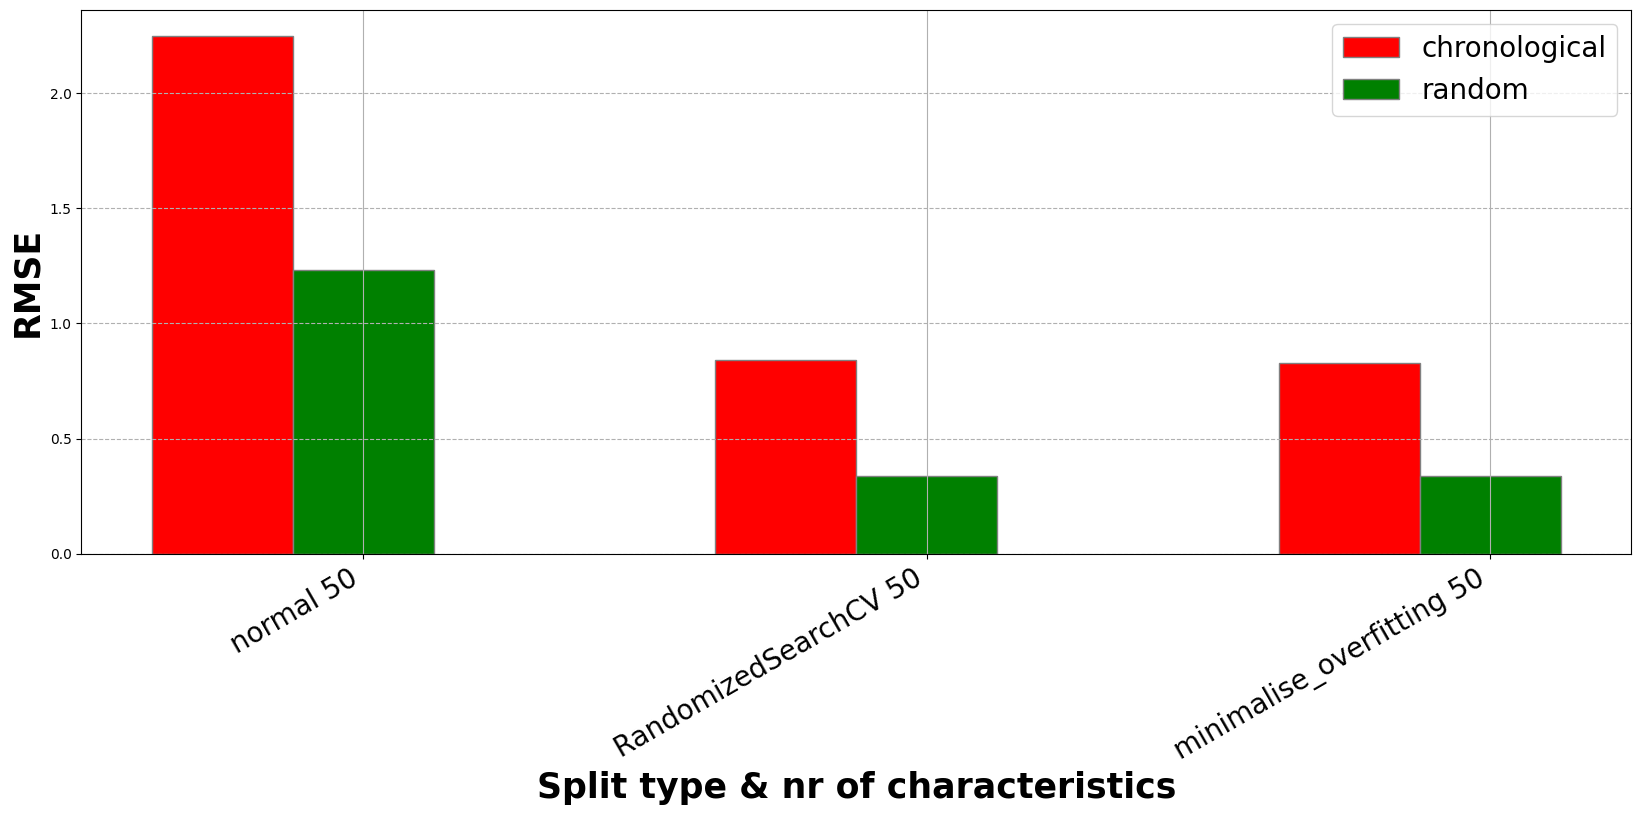

In [45]:
plot_summary(results, "RMSE")

In [46]:
results.to_json("./random_forest_final_results.json")